# Programming for Data Analytics Project 1

## Libraries

In [21]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Verifying package versions for binder requirements.txt file:

print("Numpy version is", np.__version__)
print("Pandas version is", pd.__version__)
print("Seaborn version is", sns.__version__)

import matplotlib
print("Matplotlib version is", matplotlib.__version__)

import imblearn
print("Imblearn version is ", imblearn.__version__)

import sklearn
print("ScikitLearn version is", sklearn.__version__)

Numpy version is 1.21.5
Pandas version is 1.4.2
Seaborn version is 0.11.2
Matplotlib version is 3.5.1
Imblearn version is  0.9.1
ScikitLearn version is 1.1.3


## 1. Introduction of the dataset 
<img src="https://media.istockphoto.com/id/1168179082/photo/man-with-brain-stroke-symptoms.jpg?s=612x612&w=0&k=20&c=eYZ9ayO0rR0Su3vN3EU48CxOOnwxUXDgXhpAYb2s7L4=" width="100">

After researching possible options for this assignment, I decided to explore an area that is related to my current job in the medical device industry. It is called the Stroke Prediction Dataset.<p>
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<p>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.<p>

### 1.1 Importing data

In [23]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 1.2 Exploring the data

In [24]:
df.shape

(5110, 12)

This dataset has 5110 rows and 12 columns, it is a 2 dimensional array in Numpy terms.

In [25]:
# Counting the number of people who suffered stroke (1) and who didn't (0)
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [26]:
# verview of the dataset for variable count and datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In this dataset there are 12 columns, the first of which is and int64 datatype for "id", which does not have any infomration content for this analysis, therefore can be considered insignificant.
There is a mix of datatypes in the columns/variable some are deemed numerical (int64, float64), others are categorical objects.
Columns "gender", "ever_married", "work type", "Residence_type" and "smoking_status" are identified as categorical data, which can be converted into numerical datatypes.

In [27]:
# Dropping the "id" column as it is irrelevant
df.drop(["id"], axis = 1, inplace=True)

# Showing the dataset w/o "id"
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
# Statistical summary of numerical data:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The DataFrame.describe() command is meant to provide a statistical summary of all numerical data. 

The "bmi" column only includes 4909 datapoints, as opposed to all other columns with 5110 datapoints.
On review of empty/missing data the same can be confirmed by using the isna().sum or isnull().sum() methods.


In [29]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null/na values within the "bmi" column. 
This is a significant number of lines and I would not suggest to have them dropped out of the dataset. It is possible to fill those blanks with the mean of all values in the bmi column.

In [31]:
# Reviewing the statistical summary of the "bmi" column.
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [32]:
# Filling the missing values with the mean of the bmi column:
df.fillna(df["bmi"].mean(), inplace=True)

In [33]:
# Reviewing the updated state of the bmi column.
df.bmi.describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [34]:
# Review again the dataframe for missing values:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no more missing values in the dataset.

### 1.3 Visualizing data

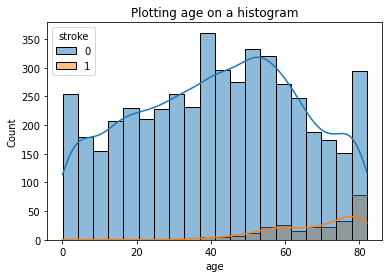

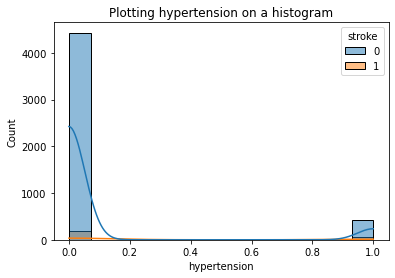

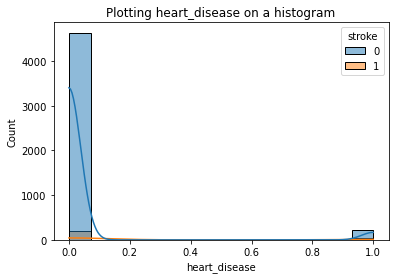

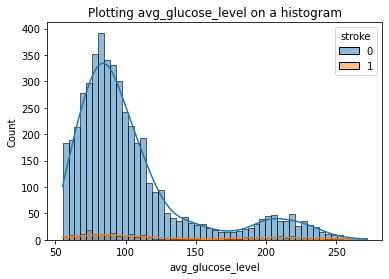

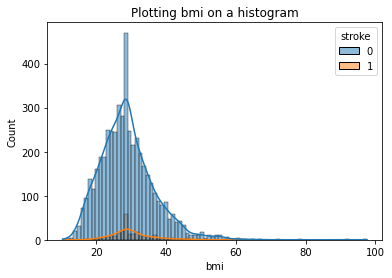

In [35]:
# Importing Seaborn for visualization
import seaborn as sns

# Plot each numerical variable on historgrams to drwa conclusion on the type of distribution:

for i in df.columns[1:-1]: # excluding the last column "stroke"
    if (df[i].dtype == "int64") or (df[i].dtype =="float64"):
        sns.histplot(data=df, x=i, kde=True, hue = df["stroke"])
        plt.title("Plotting {} on a histogram".format(i))
        plt.show()

Distribution of the datapoints vary significantly with bmi and avg_glucose_level more trending towards a lognormal distribution and age more towards a uniform distibution.

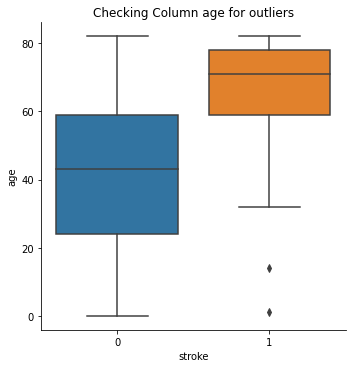

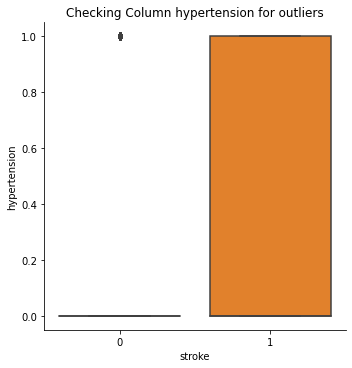

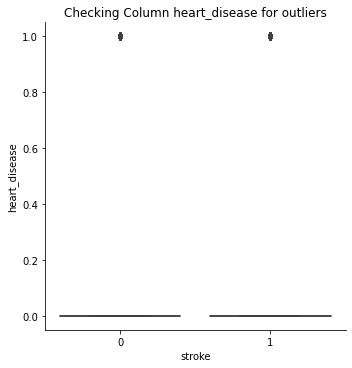

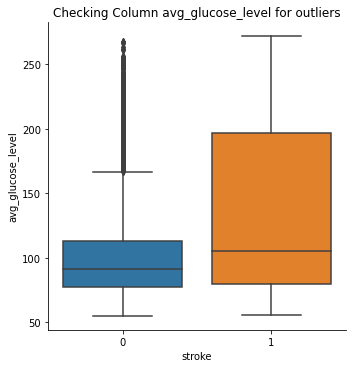

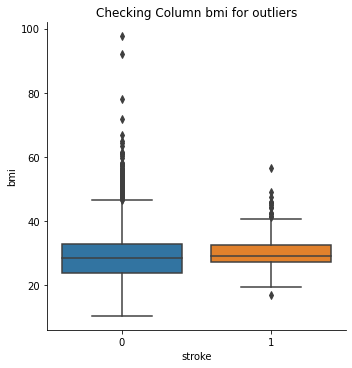

In [36]:
# Plotting numerical variable to check for outliers:

for i in df.columns[:-1]:
    if (df[i].dtype == "int64") or (df[i].dtype =="float64"):
        sns.catplot(data=df, x = "stroke", y = i, kind = "box")
        plt.title("Checking Column {} for outliers".format(i))
        plt.show()


Following variables have outliers:
- "age" - "stroke" < 20 
- "bmi" - "no stroke" > 80 

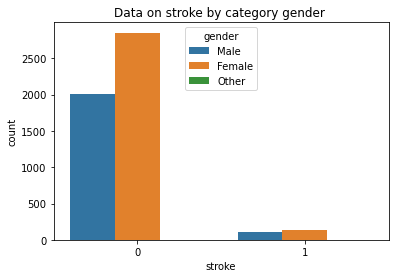

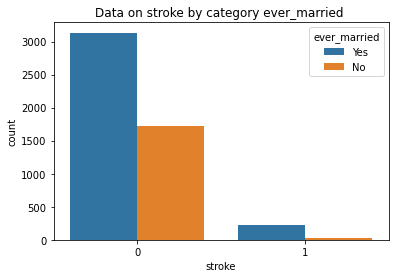

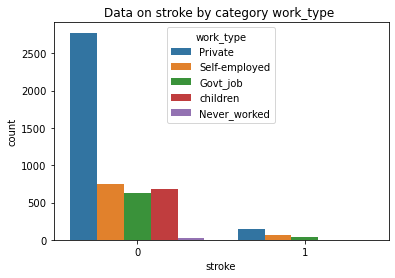

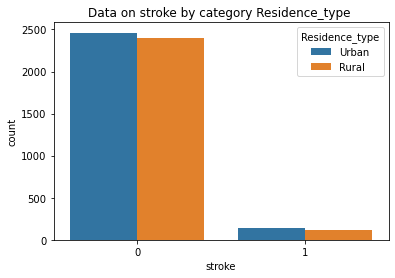

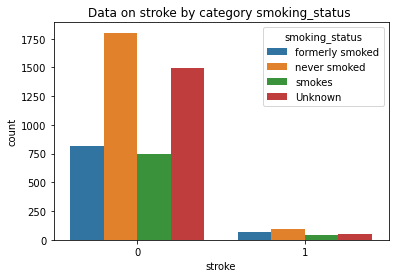

In [37]:
# Visualization of cases of stroke(1) vs no stroke (0) against categorical data: 

for i in df.columns[:]:
    if df[i].dtype == "object":
        sns.countplot(data = df, x = 'stroke', hue = i)
        plt.title("Data on stroke by category {} ".format(i))
        plt.show()

Text(0.5, 1.0, 'Imbalance within the data for stroke')

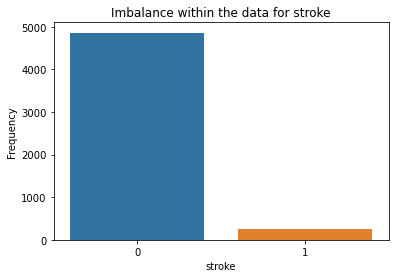

In [38]:
# Counting the frequency for no stroke (0) and stroke (1) patients

stroke_count = (df["stroke"].value_counts().reset_index()
                .rename(columns={"stroke":"Frequency", "index":"stroke"})
               )
#Plotting the difference/imbalanced graph for storke
sns.barplot(data=stroke_count, x = "stroke", y = "Frequency")
plt.title("Imbalance within the data for stroke")

In [39]:
# Checking for correlation across the numerical variables
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


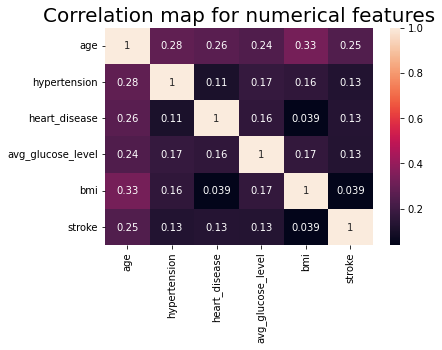

In [40]:
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation map for numerical features", fontsize = 20)
plt.show()

There is weak relationship between the occurrances of stroke and the included numerical variables in this dataset. Strong relationships are considered when the values are beyond the 0.8 mark, close to 1.0.

## 2. Preprocessing

### 2.1 Encoding categorical features into numeric arrays
This is necessary to allow feeding data into scikit-learn estimators such as linear models and SVMs

#### 2.1.1 OneHotEncoder()

In [41]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown = "error")
X = df[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]
temp_df= one_hot_enc.fit_transform(X).toarray()
temp_df

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
one_hot_enc.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [43]:
# Create new dataframe with the new columns and data type of integers
encoded_df = pd.DataFrame(columns = one_hot_enc.get_feature_names_out(), data=temp_df)
encoded_df = encoded_df.astype(int)
encoded_df

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [44]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [45]:
# Merging the two dataframes into one:

df_new = pd.concat([df, encoded_df], axis = 1)
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,...,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,...,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,...,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,...,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,...,0,0,1,0,1,0,0,0,1,0


In [46]:
# Dropping the columns with the original categorical features:
df_new.drop(["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis = 1, inplace = True)
df_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


### 2.2 Normalization of continuous variables

Text(0.5, 1.0, 'Average Glucose Level Pre Normalization')

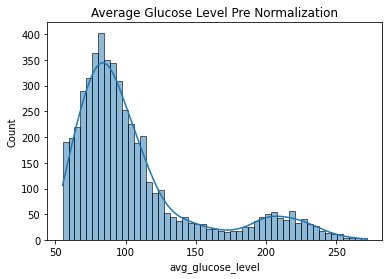

In [47]:
# Plotting the histogram for avg_glucose_level pre and post normalization
sns.histplot(data=df_new, x = "avg_glucose_level", kde = True)
plt.title("Average Glucose Level Pre Normalization")

Text(0.5, 1.0, 'Average Glucose Level Post Normalization')

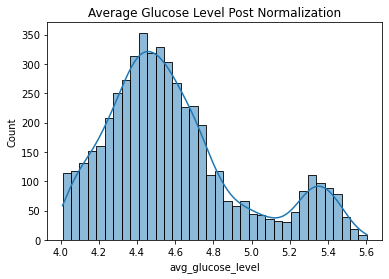

In [48]:
sns.histplot(df_new.avg_glucose_level.apply(np.log), kde = True)
plt.title("Average Glucose Level Post Normalization")

Text(0.5, 1.0, 'BMI Pre Normalization')

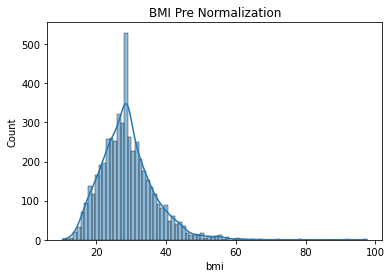

In [49]:
# # Plotting the histogram for avg_glucose_level pre and post normalization
sns.histplot(data=df_new, x = "bmi", kde = True)
plt.title("BMI Pre Normalization")

Text(0.5, 1.0, 'BMI Post Normalization')

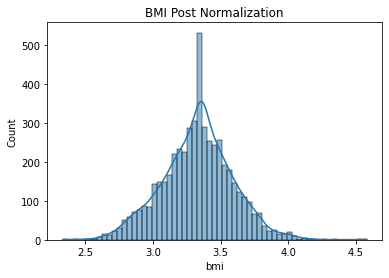

In [50]:
sns.histplot(df_new.bmi.apply(np.log), kde = True)
plt.title("BMI Post Normalization")

In [51]:
# Normalizing the columns "avg_glucose_level" and "bmi"
df_new[["avg_glucose_level", "bmi"]] = np.log(df_new[["avg_glucose_level", "bmi"]])
df_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,5.432367,3.600048,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,5.309307,3.363608,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,4.662684,3.481240,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,5.143008,3.538057,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,5.159745,3.178054,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


## 3. Balancing

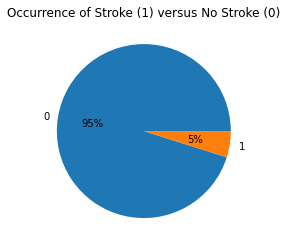

In [52]:
data = df_new["stroke"].value_counts()
labels = df_new["stroke"].value_counts().index
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.title("Occurrence of Stroke (1) versus No Stroke (0)")
plt.show()

As per above pie chart and barcharts under section 1.3 Visualization of data, it is evident that the dataset for stroke is imbalanced.<p>
Trying to build a model on this dataset would result in a bias towards the outcome of no stroke event. 95% of datapoints are with no stroke and 5% of the datapoints are with stroke outcome.<p>
Before selecting and training any model the imbalance in the data needs to be addressed.<p>

There are multiple options to deal with unbalanced data as read in the following article [5 Techniques to work with Imbalanced Data in Machine Learning](https://towardsdatascience.com/5-techniques-to-work-with-imbalanced-data-in-machine-learning-80836d45d30c) <p>
<pb>
- 1) Upsampling Minority Class
- 2) Downsampling Majority Class
- 3) Generate Synthetic Data
- 4) Combine Upsampling & Downsampling Techniques 
- 5) Balanced Class Weight

I selected [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) (Synthetic Minority Over-Sampling Technique), a popular synthetic data generation oversampling technique.
I needed to install the latest version of imbalanced-learn-0.9.1 scikit-learn-1.1.3 to run this module.

In [53]:
#Identifying the inputs/variables (X) and outputs/target (y) values

X = df_new.drop(["stroke"], axis=1)
y = df_new["stroke"]

print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 4861, 1: 249})


In [54]:
# Oversampling - sythesizing datapoints to balance the dataset for accurate modelling

sm = SMOTE(random_state=42) # random_state: passing an integer value (0 or 42) ensures the reproducability of the results
X, y = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({1: 4861, 0: 4861})


In [55]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.000000,0,1,5.432367,3.600048,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.000000,0,0,5.309307,3.363608,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.000000,0,1,4.662684,3.481240,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.000000,0,0,5.143008,3.538057,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.000000,1,0,5.159745,3.178054,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,78.128493,0,0,4.755283,3.395461,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
9718,71.030380,0,0,5.568156,3.648104,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
9719,79.287246,0,0,4.977417,3.390238,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
9720,75.046258,0,0,4.380808,3.376941,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [56]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: stroke, Length: 9722, dtype: int64

Additional datapoints have been generated now so there are equal number of datapoints (9722) for "stroke-1" and "no stroke-0" target values.

## 4. Modelling

In [57]:
# Creating the split of the resampled dataset for train and test samples
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 4.1 Fitting and Predicting with alternative methods

In [58]:
# Random Forest Classifier is a meta estimator that fits a number of decision tree classifiers on 
# various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
rfc = RandomForestClassifier(n_estimators=60, random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [59]:
rfc.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [60]:
# Support Vector Classification (SVC) method 
# from the Support Vector Machines learning methods used for classification, regression and outlier detection.
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [61]:
svc.predict(X_test)

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [62]:
# The Gradient Boosting method is an algorithm which builds an additive model
#  it allows for the optimization of arbitrary differentiable loss functions.
gbc = GradientBoostingClassifier(n_estimators=60, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=60, random_state=0)

In [63]:
gbc.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

### 5. Scoring

In order to check the score of these models a cross validation method in Scikit Learn can be utilized.
This evaluates the score by cross validation, returning a list/array of the 5 scores which are generated through different types of training/test data scenarios. The random_state parameter was set to zero in order to ensure that there is no shuffling of the data takes place.

In [64]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [65]:
from sklearn.model_selection import cross_val_score
# Score for Random Forest Classifier method
ac_rfc = cross_val_score(RandomForestClassifier(n_estimators=60, random_state=0), X, y)
ac_rfc

array([0.90539846, 0.97377892, 0.97736626, 0.97839506, 0.97530864])

In [66]:
# Score for SVC method
cross_val_score(SVC(random_state=0), X, y)

array([0.78200514, 0.78046272, 0.77417695, 0.78343621, 0.80915638])

In [67]:
# Score for Gradient Boost Classifier method
cross_val_score(GradientBoostingClassifier(n_estimators=60,random_state=0), X, y)

array([0.88329049, 0.92699229, 0.92592593, 0.93004115, 0.92849794])

## Conclusion

## References
References are included in the ReadMe.md file in the main project folder.

## License
This Notebook was released under GNU General Public License v3.0 license.

# End